#Prediction Model for Distribution Center Receiving Forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
import plotly.figure_factory as ff
import sklearn.metrics as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import warnings 
warnings. filterwarnings("ignore")

In [3]:
! git clone https://github.com/aviraljoshi23/Hacks.git

Cloning into 'Hacks'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 33 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [4]:
inbound = pd.read_excel('/content/Hacks/dataset-New/Inbound.xlsx')
sales = pd.read_excel('/content/Hacks/dataset-New/Sales units.xlsx')

In [273]:
units = pd.read_excel('/content/Hacks/dataset-New/Recipt Units.xlsx',parse_dates = False)

In [274]:
units.head()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
0,92,1,2019,1,22944.0
1,92,2,2019,1,32856.0
2,92,3,2019,1,1536.0
3,92,4,2019,1,55714.0
4,92,5,2019,1,940.0


In [275]:
units.tail()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
241492,64,186,2021,34,812.0
241493,64,187,2021,34,3372.0
241494,64,251,2021,34,25422.0
241495,64,188,2021,34,6231.0
241496,64,293,2021,34,347.0


In [276]:
unit_test = units.copy()

In [277]:
inbound.head()

,Scrub_dc_no,Year,Week,Inbound Truckloads
0,92,2019,1,115
1,76,2019,1,165
2,78,2019,1,161
3,98,2019,1,189
4,3,2019,1,113


In [278]:
sales.head()

,SCRUB_DC_NO,YEAR,WEEK,SCRUB_CATEGORY_NO,SALES_UNITS
0,3,2019,1,1,18871
1,3,2019,1,2,22076
2,3,2019,1,3,5459
3,3,2019,1,4,36976
4,3,2019,1,5,3832


In [279]:
def data_description(data):
  print(data.info())
  print('---'*30)
  print(data.describe().T)
  print('---'*30)
  print(data.isnull().any())
  print('---'*30)
  print(data.nunique())
  return 

In [280]:
data_description(units)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241497 entries, 0 to 241496
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SCRUB_DC_NO        241497 non-null  int64  
 1   SCRUB_Category_no  241497 non-null  int64  
 2   Year               241497 non-null  int64  
 3   Week               241497 non-null  int64  
 4   ReceiptUnits       241497 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 9.2 MB
None
------------------------------------------------------------------------------------------
                      count         mean          std  ...     50%     75%       max
SCRUB_DC_NO        241497.0    64.995346    28.327958  ...    76.0    92.0      98.0
SCRUB_Category_no  241497.0   140.843162    88.473886  ...   139.0   209.0     347.0
Year               241497.0  2019.901212     0.772693  ...  2020.0  2021.0    2021.0
Week               241497.0    24.371466    14.310415  ...   

In [281]:
data_description(inbound)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Scrub_dc_no         1093 non-null   int64
 1   Year                1093 non-null   int64
 2   Week                1093 non-null   int64
 3   Inbound Truckloads  1093 non-null   int64
dtypes: int64(4)
memory usage: 34.3 KB
None
------------------------------------------------------------------------------------------
                     count         mean        std  ...     50%     75%     max
Scrub_dc_no         1093.0    64.626715  28.617691  ...    76.0    92.0    98.0
Year                1093.0  2019.907594   0.781931  ...  2020.0  2021.0  2021.0
Week                1093.0    24.240622  14.299636  ...    24.0    35.0    52.0
Inbound Truckloads  1093.0   353.197621  89.245470  ...   355.0   416.0   638.0

[4 rows x 8 columns]
-------------------------------------------------------

In [282]:
data_description(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356992 entries, 0 to 356991
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   SCRUB_DC_NO        356992 non-null  int64
 1   YEAR               356992 non-null  int64
 2   WEEK               356992 non-null  int64
 3   SCRUB_CATEGORY_NO  356992 non-null  int64
 4   SALES_UNITS        356992 non-null  int64
dtypes: int64(5)
memory usage: 13.6 MB
None
------------------------------------------------------------------------------------------
                      count         mean          std  ...     50%     75%       max
SCRUB_DC_NO        356992.0    64.501689    28.702662  ...    76.0    92.0      98.0
YEAR               356992.0  2019.873490     0.777990  ...  2020.0  2020.0    2021.0
WEEK               356992.0    24.371258    14.417331  ...    24.0    35.0      52.0
SCRUB_CATEGORY_NO  356992.0   165.169337    95.922414  ...   164.0   246.0     347.0
S

In [283]:
units.shape

(241497, 5)

In [284]:
units['SCRUB_DC_NO'].value_counts()

41    31723
92    31055
98    30647
78    30382
76    30026
65    29665
64    29198
3     28801
Name: SCRUB_DC_NO, dtype: int64

# Units Exploring 

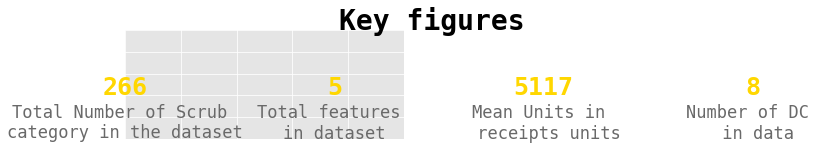

In [285]:
fig=plt.figure(figsize=(5,2),facecolor='white')

ax0=fig.add_subplot(1,1,1)
ax0.text(1.1,1,"Key figures",color='black',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"266",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.005,"Total Number of Scrub \ncategory in the dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(0.75,0.4,"5",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.001,"Total features \nin dataset",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"5117",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.001,"Mean Units in \n receipts units",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"8",color='gold',fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.001,"Number of DC \n in data",color='dimgrey',fontsize=17, fontweight='light', fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.tick_params(axis='y',length=0)
ax0.tick_params(axis='x',length=0)
ax0.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax0.spines[direction].set_visible(False)

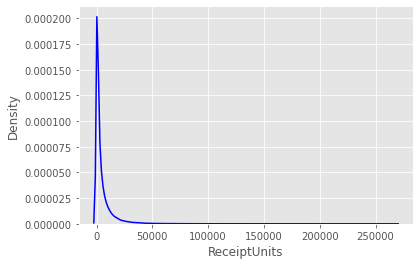

In [286]:
sns.kdeplot(units['ReceiptUnits'], color='b', shade=False, Label='ReceiptUnits') 

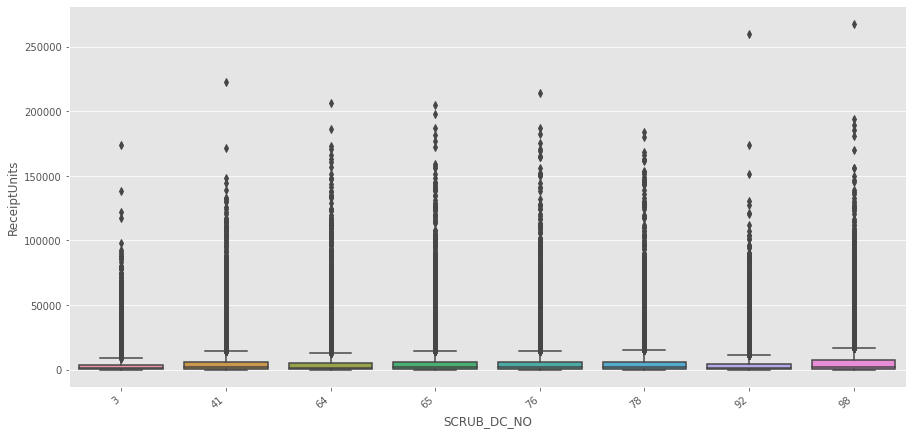

In [287]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='SCRUB_DC_NO',y='ReceiptUnits',data=units)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

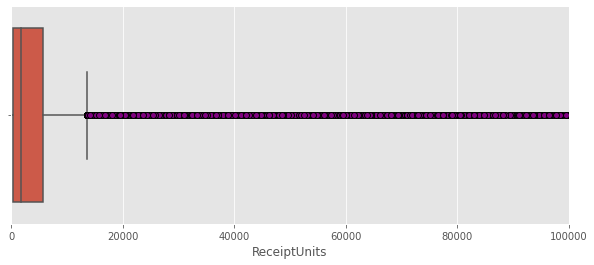

In [288]:
plt.figure(figsize=(10,4))
plt.xlim(-100,100000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
sns.boxplot(x=units.ReceiptUnits, flierprops=flierprops)

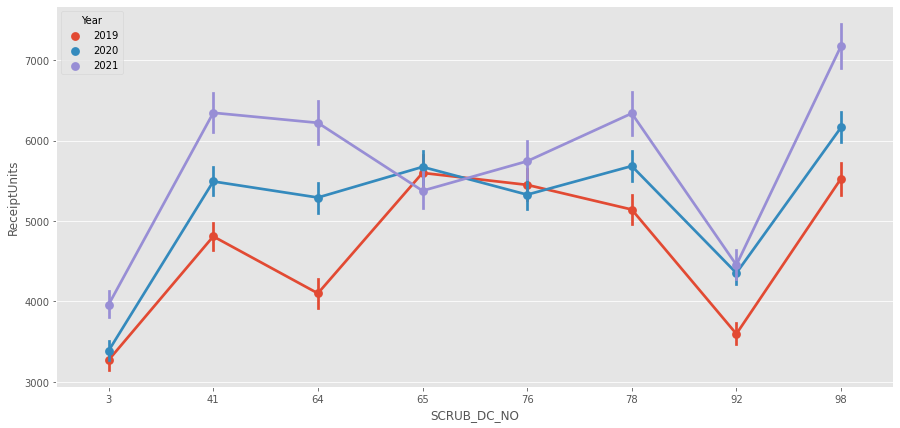

In [289]:
plt.figure(figsize=(15,7))
sns.pointplot(x='SCRUB_DC_NO', y='ReceiptUnits', hue='Year', data=units)
plt.show()

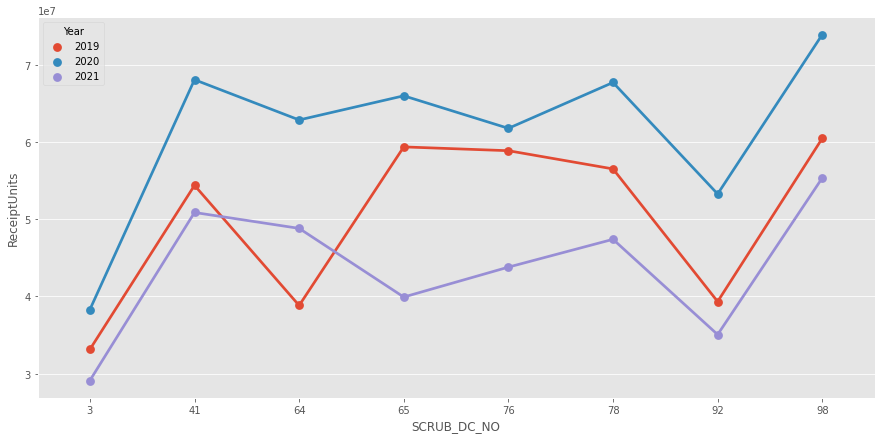

In [290]:
plt.figure(figsize=(15,7))
grouped = pd.DataFrame(units.groupby(['Year','SCRUB_DC_NO'])['ReceiptUnits'].sum().reset_index())
sns.pointplot(x='SCRUB_DC_NO', y='ReceiptUnits', hue='Year', data=grouped)
plt.show()

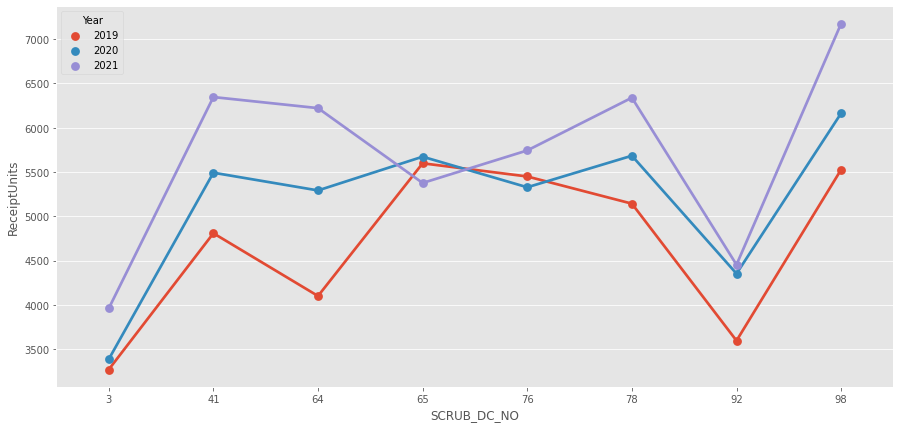

In [291]:
plt.figure(figsize=(15,7))
grouped = pd.DataFrame(units.groupby(['Year','SCRUB_DC_NO'])['ReceiptUnits'].mean().reset_index())
sns.pointplot(x='SCRUB_DC_NO', y='ReceiptUnits', hue='Year', data=grouped)
plt.show()

In [292]:
units['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

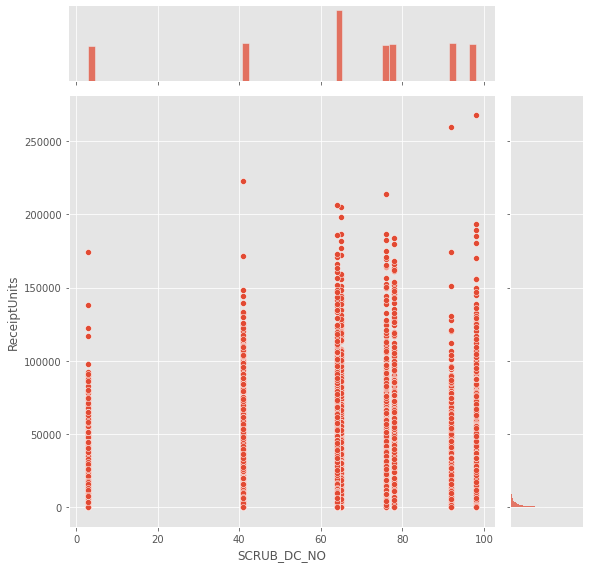

In [293]:
sns.jointplot(x="SCRUB_DC_NO", y="ReceiptUnits", data=units, height=8)
plt.show()

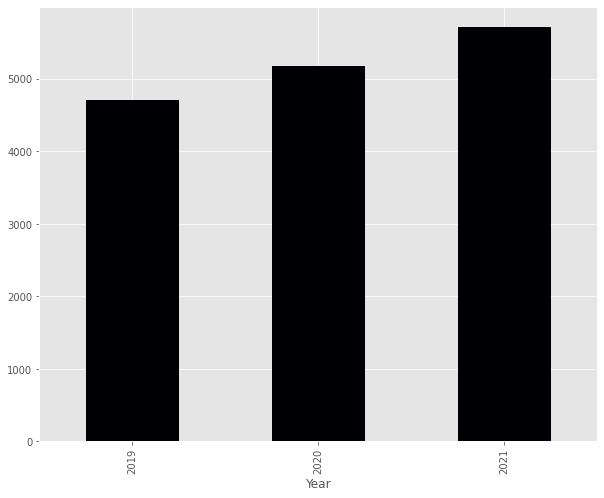

In [294]:
plt.figure(figsize=(10,8))
units.groupby('Year')['ReceiptUnits'].mean().plot(kind='bar',cmap = 'inferno')
plt.show()

***From the above figure we can see that units are increasing with the increase in the year***

In [295]:
units.sample()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
230046,64,130,2020,37,0.0


#*Feature Engineering*

---



In [296]:
# Dropping all rows whose 'ReceiptUnits' is negative 
l1 = np.where(units['ReceiptUnits'] < 0)
units.drop(l1[0],inplace=True)
units.index = range(0,units.shape[0])

In [390]:
units.sample()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
34229,98,147,2019,18,430.0


In [298]:
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True) #subset is list where you have to put all column for duplicate check
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

In [299]:
# Drop Duplicate Data
subset = ['SCRUB_DC_NO','ReceiptUnits']
drop_duplicate(units, subset = subset)

Before drop shape: (241497, 5)
After drop shape: (83641, 5)
Total Duplicate: 157856


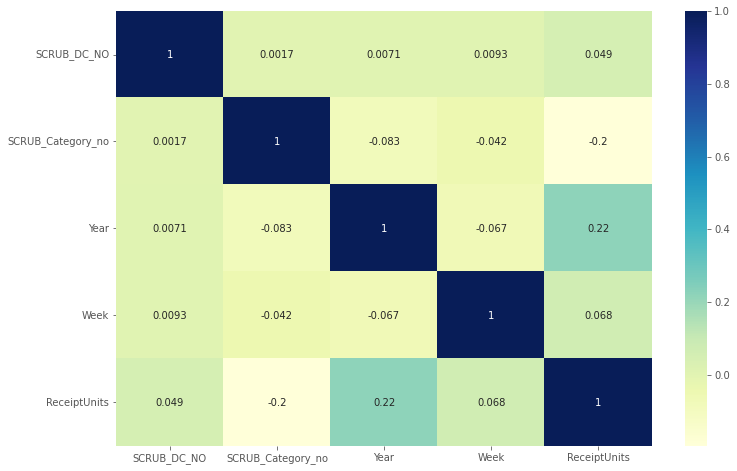

In [300]:
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(units.corr(), cmap="YlGnBu", annot=True)
plt.show()


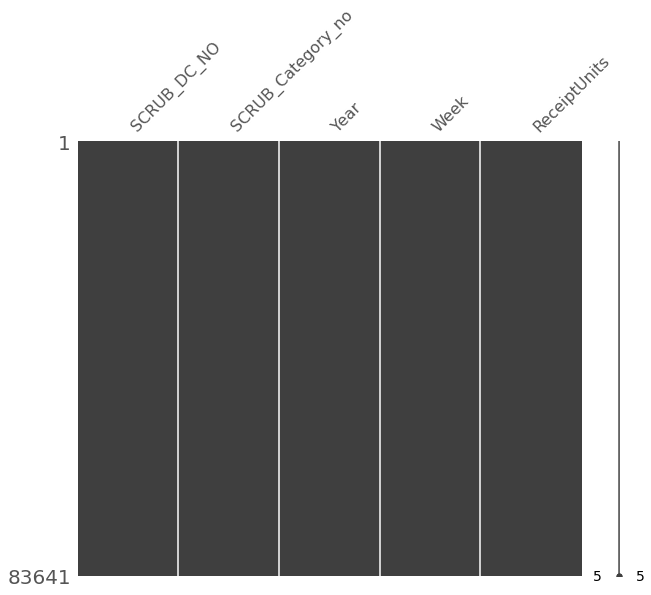

In [301]:
import missingno as msno
msno.matrix(units,figsize=(10,8))
plt.show()

In [302]:
print("Skewness: %f" % units['ReceiptUnits'].skew())

Skewness: 3.961788


In [303]:
units.sample()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
13202,76,19,2019,28,37465.0


In [304]:
X = np.array(units.drop(['ReceiptUnits'],axis = 1))
y = np.array(units.iloc[:,4])

In [305]:
print(X.shape)
print(y.shape)

(83641, 4)
(83641,)


In [306]:
X

array([[  92,    1, 2019,    1],
       [  92,    2, 2019,    1],
       [  92,    3, 2019,    1],
       ...,
       [  64,  184, 2021,   34],
       [  64,  251, 2021,   34],
       [  64,  188, 2021,   34]])

In [307]:
y

array([22944., 32856.,  1536., ...,  9585., 25422.,  6231.])

In [308]:
#X = units.drop(['SCRUB_DC_NO','SCRUB_Category_no','Year','Week'], axis=1, inplace=True)
#y = units['ReceiptUnits']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=43)

In [310]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor
import time
import sys
import gc
import pickle 

In [450]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1,
              random_state=42)
model_lasso.fit(X_train, y_train)

test_pred = model_lasso.predict(X_test)
train_pred = model_lasso.predict(X_train)

print('Train set mse:', mean_squared_error(y_train, model_lasso.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, model_lasso.predict(X_test)))
print('Train set score:', model_lasso.score(X_train,y_train))
print('Test set score:', model_lasso.score(X_test,y_test))

Train set mse: 191233278.47736087
Test set mse: 195837290.67451695
Train set score: 0.08824320765954863
Test set score: 0.09003118502319218


In [464]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(random_state=49)
model_ridge.fit(X_train, y_train)
pred = model.predict(X_test)

print('Train set mse:', mean_squared_error(y_train, model_ridge.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, model_ridge.predict(X_test)))
print('Train set score:', model_ridge.score(X_train,y_train))
print('Test set score:', model_ridge.score(X_test,y_test))

Train set mse: 191233278.46592042
Test set mse: 195837283.69771782
Train set score: 0.088243207714094
Test set score: 0.09003121744127573


In [356]:
forest_model= RandomForestRegressor(n_estimators =1000,
                                    random_state = 9,
                                    max_depth=15,
                                    max_features=4,
                                    n_jobs=7,
                                    min_samples_split=5)
forest_model.fit(X_train, y_train)

#make predictions using Random forest regresssor
print('Train set mse:', mean_squared_error(y_train, forest_model.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, forest_model.predict(X_test)))
print('Train set score:', forest_model.score(X_train,y_train))
print('Test set score:', forest_model.score(X_test,y_test))

Train set mse: 59560658.480124116
Test set mse: 104499391.35484073
Train set score: 0.7160283222778512
Test set score: 0.5144377917533369


In [312]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
 
# create a regressor object
regressor = DecisionTreeRegressor(random_state=13,ccp_alpha=0.8,max_depth=100,max_features=4,min_samples_leaf=10,splitter='best')
 
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, regressor.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, regressor.predict(X_test)))
print('Train set score:', regressor.score(X_train,y_train))2
print('Test set score:', regressor.score(X_test,y_test)2)

Train set mse: 78630480.58327538
Test set mse: 104779347.81662455
Train set score: 0.6251077462687409
Test set score: 0.5131369585519732


In [439]:
#grad_boost = GradientBoostingRegressor(learning_rate = 0.1,n_estimators = 500, random_state = 42,max_features=4,alpha=0.1,max_depth=5)
grad_boost = GradientBoostingRegressor(learning_rate = 0.1,n_estimators = 500, random_state = 42,max_features=4,alpha=0.1,max_depth=5)
grad_boost.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train, grad_boost.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, grad_boost.predict(X_test)))
print('Train set score:', grad_boost.score(X_train,y_train))
print('Test set score:', grad_boost.score(X_test,y_test))

Train set mse: 84552261.76235999
Test set mse: 95333890.4427748
Train set score: 0.5968740400028965
Test set score: 0.5570257992512713


In [484]:
ts = time.time()


model = LGBMRegressor(objective='regression', 
    max_depth = 10,
    n_estimators = 1000,
    colsample_bytree=0.7,
    min_child_weight = 10,
    reg_alpha = 0.01,
    feature_fraction_seed=8,
    reg_lambda = 1,
    subsample = 0.7,
    random_state = 49,
    )

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=100, 
    early_stopping_rounds = 20) # use LGBM's 

time.time() - ts

Training until validation scores don't improve for 20 rounds.
[100]	training's l2: 1.13532e+08	training's rmse: 10655.1	valid_1's l2: 1.14076e+08	valid_1's rmse: 10680.6
[200]	training's l2: 1.08681e+08	training's rmse: 10425	valid_1's l2: 1.09662e+08	valid_1's rmse: 10472
[300]	training's l2: 1.06982e+08	training's rmse: 10343.2	valid_1's l2: 1.08414e+08	valid_1's rmse: 10412.2
[400]	training's l2: 1.06214e+08	training's rmse: 10306	valid_1's l2: 1.07882e+08	valid_1's rmse: 10386.6
[500]	training's l2: 1.05766e+08	training's rmse: 10284.3	valid_1's l2: 1.07699e+08	valid_1's rmse: 10377.8
[600]	training's l2: 1.05503e+08	training's rmse: 10271.5	valid_1's l2: 1.0763e+08	valid_1's rmse: 10374.5
[700]	training's l2: 1.05327e+08	training's rmse: 10262.9	valid_1's l2: 1.07568e+08	valid_1's rmse: 10371.5
Early stopping, best iteration is:
[754]	training's l2: 1.05255e+08	training's rmse: 10259.4	valid_1's l2: 1.07546e+08	valid_1's rmse: 10370.4


4.1987080574035645

In [485]:
print('Train set mse:', mean_squared_error(y_train, model.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, model.predict(X_test)))
print('Train set score:', model.score(X_train,y_train))
print('Train set score:', model.score(X_test,y_test))

Train set mse: 105255061.0254461
Test set mse: 107546028.1019918
Train set score: 0.49816780017438106
Train set score: 0.5002814254100263


In [434]:
xgb = XGBRegressor(
    max_depth=7,
    n_estimators=5000,
    learning_rate=0.2,
    min_child_weight=300,   
    colsample_bytree=0.8, 
    subsample=0.8, 
    gamma = 0.005,
    eta=0.2,    
    seed=42,
    silent=1)



xgb.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, xgb.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, xgb.predict(X_test)))
print('Train set score:', xgb.score(X_train,y_train))
print('Test set score:', xgb.score(X_test,y_test))

Train set mse: 74929296.63046779
Test set mse: 95736729.58425932
Train set score: 0.6427541498421299
Test set score: 0.5551539848744467


In [426]:
from sklearn.linear_model import Lasso

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = Lasso(max_iter=5000)
regr.fit(X_train, y_train)
print('Train set mse:', mean_squared_error(y_train,regr.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, regr.predict(X_test)))
print('Train set score:', regr.score(X_train,y_train))
print('Test set score:', regr.score(X_test,y_test))

Train set mse: 191233280.27323326
Test set mse: 195837419.76971838
Train set score: 0.08824319909723732
Test set score: 0.09003058517519058


In [384]:
from sklearn.ensemble import VotingRegressor
v_model = VotingRegressor([('v1', xgb), ('v2', grad_boost),('v3', regressor),('v4',forest_model)])
v_model.fit(X_train, y_train)

[16:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('v1',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.8, eta=0.3,
                                          gamma=0.005, importance_type='gain',
                                          learning_rate=0.8, max_delta_step=0,
                                          max_depth=8, min_child_weight=300,
                                          missing=None, n_estimators=1000,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                             

In [385]:
print('Train set mse:', mean_squared_error(y_train, v_model.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, v_model.predict(X_test)))
print('Train set score:', v_model.score(X_train,y_train))
print('Test set score:', v_model.score(X_test,y_test))

Train set mse: 68084062.21462266
Test set mse: 93223000.46644166
Train set score: 0.6753906711814233
Test set score: 0.5668341664100202


In [ ]:
98	147	2019	18	430.0

In [430]:
units.sample()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
67517,41,36,2019,46,41988.0


In [431]:
SCRUB_DC_NO = 41
SCRUB_Category_no = 36
Year = 2019
Week = 46
#3372.0
prediction=grad_boost.predict([[SCRUB_DC_NO,SCRUB_Category_no,Year,Week]])
print('Receipt Unit {}'.format(prediction))

Receipt Unit [29738.26943018]


In [ ]:
prediction = grad_boost.predict(test_data)

In [486]:
test_data = pd.read_csv('/content/final_dummy_ReceiptUnits.csv')
test_data.head()

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week
0,76,75,2021,35
1,76,318,2021,35
2,76,240,2021,35
3,76,304,2021,35
4,76,19,2021,35


In [487]:
prediction = grad_boost.predict(test_data)

In [488]:
test_copy = test_data.copy()

In [489]:
sub_df = pd.DataFrame({'SCRUB_DC_NO':test_copy.SCRUB_DC_NO,
                       'SCRUB_Category_no':test_copy.SCRUB_Category_no,
                       'Year':test_copy.Year,
                       'Week':test_copy.Week,
                       'ReceiptUnits': prediction})

In [490]:
sub_df.to_csv('Project_Submission.csv', index=False)

In [491]:
from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(grad_boost, 'gradient_boosting.pkl')

['gradient_boosting.pkl']